<a href="https://colab.research.google.com/github/newfull5/AI-Project/blob/master/Mnist_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist #학습 데이터 다운로드
from keras.utils import np_utils #바이너리화(원 핫 인코딩)를 위해 필요

In [0]:
import numpy as np
import tensorflow as tf
import sys

In [0]:
#seed 값 설정
#컴퓨터는 랜덤테이블에서 난수를 가져오는데 시드 값을 일정히 하여 항상 같은 난수가 생성되게끔 한다.
seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)

In [0]:
#데이터 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [59]:
print('학습 데이터의 개수',X_train.shape[0])
print('테스트 데이터의 개수',X_test.shape[0])

학습 데이터의 개수 60000
테스트 데이터의 개수 10000


In [60]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [0]:
X_train = X_train.reshape(X_train.shape[0], 784) #2차원 배열을 1차원으로 만듦

In [0]:
X_train = X_train.astype('float64') / 255 #까닭은 모르겠으나 케라스는 0~1사이에서 잘 동작한다 함 그래서 float 타입으로 변환 후 나누기 255

In [0]:
X_test = X_test.reshape(X_test.shape[0], 784)

In [0]:
X_test = X_test.astype('float64') / 255

In [0]:
Y_train = np_utils.to_categorical(Y_train, 10) #원 핫 인 코딩 0123456789 를 인식하지 못함
Y_test = np_utils.to_categorical(Y_test, 10) #하여! 1 => [0,0,0,0,0,0,0,1] 이렇게 바꿔야함

In [0]:
from keras.layers import Dense
from keras.models import Sequential

In [0]:
model = Sequential() #모델을 생성합니다.
model.add(Dense(512, input_dim=784, activation='relu')) #데이텀은 784개의 특징을 가진 일차원 배열입니다. 활성화 함수로는 relu를 사용합니다.오차 역전파시 기울기가 소실되는 것을 방지합니다.
model.add(Dense(10, activation='softmax')) #활성화 함수로는 소프트 맥스를 사용합니다. 

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy']) #클래스가 2개가 아니라 binary crossentropy 가 아닌 categorical crossentropy 

In [0]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [0]:
folder = './model/'
if not os.path.exists(folder):
  os.mkdir(folder)

In [0]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)#해당경로에, 값의 오차를 기록할것
early_stop = EarlyStopping(monitor='val_loss', patience=10)#val_loss를 관찰하다가, 10회 이상 오차가 나아짐이 없으면 종료

In [72]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stop, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2995 - accuracy: 0.9165 - val_loss: 0.1547 - val_accuracy: 0.9540

Epoch 00001: val_loss improved from inf to 0.15471, saving model to ./model/01-0.1547.hdf5
Epoch 2/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1244 - accuracy: 0.9639 - val_loss: 0.1046 - val_accuracy: 0.9693

Epoch 00002: val_loss improved from 0.15471 to 0.10461, saving model to ./model/02-0.1046.hdf5
Epoch 3/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.0818 - accuracy: 0.9762 - val_loss: 0.0848 - val_accuracy: 0.9749

Epoch 00003: val_loss improved from 0.10461 to 0.08479, saving model to ./model/03-0.0848.hdf5
Epoch 4/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.0604 - accuracy: 0.9824 - val_loss: 0.0796 - val_accuracy: 0.9747

Epoch 00004: val_loss improved from 0.08479 to 0.07959, saving model to ./mod

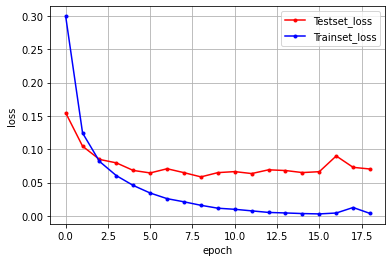

In [74]:
import matplotlib.pyplot as plt
 
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']
  
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
  
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()